In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [2]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

#print(hists['recoil'].identifiers('dataset'))
#print(hists['recoil'].project('dataset', 'MonoHs_Mzprime_500_Mhs_90_Mchi_150____0').values(overflow='all'))
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8 6235661.084600944
QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8 54204361.97182541
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 297176175890.39703
ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8 715082.9124486722
QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8 93948241.26754017
DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 11516745.853159327
ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 334874722.2088432
ZJetsToNuNu_HT-100To200_13TeV-madgraph 23675936.023209557
ggZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 26961.832887386816
ZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 558251.7187889507
ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8 5109801475.370131
ZJetsToNuNu_HT-200To400_13TeV-madgraph 23232889.88735804
QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8 54247037.513652936
MonoHs_Mzprime_500_Mhs_90_Mchi_150 297390.7091100482
ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 266

In [3]:
data_hists={}

for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
#process_map["Znunu"] = ("ZJets*",)   ## temporarily 
process_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
process_map["Mhs_70"] = ("*Mhs_70*",)
process_map["Mhs_90"] = ("*Mhs_90*",)
process_map["MonoJet"] = ("MonoJet*",)  ## signals
process_map["MonoW"] = ("MonoW*",)    ## signals
process_map["MonoZ"] = ("MonoZ*",)    ## signals
#process_map["MonoV"] = ("MonoW*","MonoZ*",)

#print(process_map)

#data_r_map['isoneE'] = 'SingleElectron'
#data_r_map['isoneM'] = 'MET'
#data_r_map['istwoE'] = 'SingleElectron'
#data_r_map['istwoM'] = 'MET'
#data_r_map['isoneA'] = 'SinglePhoton'
#data_r_map['iszeroL'] = 'MET'

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

#print(hists['recoil'].identifiers('process'))
#print(hists['recoil'].project('MonoDh', 'MonoHs_Mzprime_500_Mhs_50_Mchi_150').values(overflow='all')[()][1])

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
nfjets
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TvsQCD
hSvsQCD
VvsQCD
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers


In [5]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [6]:
hists['recoil'].project('process','Hbb').values()

{('iszeroL',
  'baggy'): array([2.32308808e+01, 1.50204699e+01, 9.91952627e+00, 6.28005409e+00,
        4.09699870e+00, 3.24174262e+00, 2.43887603e+00, 1.49962709e+00,
        9.29429087e-01, 6.84923469e-01, 5.60367390e-01, 3.15471600e-01,
        2.41066146e-01, 1.61115472e-01, 9.25917753e-02, 9.75905766e-02,
        4.31515625e-02, 3.41768436e-02, 3.31336419e-02, 1.61644054e-02,
        9.07513379e-03]),
 ('iszeroL',
  'skinny'): array([2.22057219e+01, 1.41843628e+01, 9.08976910e+00, 6.27491051e+00,
        3.95590087e+00, 2.91747542e+00, 2.48807626e+00, 1.56019215e+00,
        9.68844568e-01, 6.04189185e-01, 4.43689535e-01, 2.46185713e-01,
        1.38791369e-01, 7.88507347e-02, 5.91558379e-02, 5.54493398e-02,
        2.97794468e-02, 2.28573657e-02, 1.26829373e-02, 4.85260939e-03,
        4.29070403e-03]),
 ('iszeroL',
  'inclusive'): array([4.54366027e+01, 2.92048327e+01, 1.90092954e+01, 1.25549646e+01,
        8.05289957e+00, 6.15921804e+00, 4.92695228e+00, 3.05981924e+00,
       

In [7]:
data_map['isoneE'] = 'SingleElectron'
data_map['isoneM'] = 'MET'
data_map['istwoE'] = 'SingleElectron'
data_map['istwoM'] = 'MET'
data_map['isoneA'] = 'SinglePhoton'
data_map['iszeroL'] = 'MET'

for r in hists['recoil'].identifiers('region'):
    exp = 0
    print('------------------')
    print('------------------')
    print('Category:',r)
    print('------------------')
    print(hists['recoil'].identifiers('process'))
    for p in hists['recoil'].identifiers('process'):
        yld = np.sum(hists['recoil'].project('jet_selection','baggy').project('region',r).project('process', p).values(overflow='all')[()])
        exp += yld
        print(p, '%.1f' % yld)
        #for s in hists['recoil'].identifiers('jet_selection'):
            #print (s)
            #if 'baggy' in s:
            #if 'baggy' in hists['recoil'].identifiers('jet_selection'):
            #if 'baggy' == hists['recoil'].identifiers('jet_selection'): 
                #print (s)
                #yld = np.sum(hists['recoil'].project('jet_selection',s).project('region',r).project('process', p).values(overflow='all')[()])
                #exp += yld
                #print(p, '%.1f' % yld)
    print('------------------')
    print('Total expected:', '%.1f' % exp)
    print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection','baggy').project('region',r).project('process',data_map[r.name]).values(overflow='all')[()]))   
    print('------------------')
    print('------------------')
    print()

------------------
------------------
Category: isoneE
------------------
[<StringBin (Hbb) instance at 0x7f7b6c3c8048>, <StringBin (Zjets) instance at 0x7f7b6bed6eb8>, <StringBin (Diboson) instance at 0x7f7b6aa2a4a8>, <StringBin (ST) instance at 0x7f7b6c141080>, <StringBin (TT) instance at 0x7f7b6c1412e8>, <StringBin (Wjets) instance at 0x7f7b6b94af98>, <StringBin (Mhs_50) instance at 0x7f7b6b94aa90>, <StringBin (Mhs_70) instance at 0x7f7b6aac4f28>, <StringBin (Mhs_90) instance at 0x7f7b6aac4e80>, <StringBin (MonoJet) instance at 0x7f7b6abf7630>, <StringBin (MonoW) instance at 0x7f7b6abf7470>, <StringBin (MonoZ) instance at 0x7f7b6abf7518>]
Hbb 5.0
Zjets 1702.2
Diboson 542.4
ST 761.7
TT 4659.8
Wjets 35277.2


KeyError: ()

/home/jongho/Physics/Python3/decaf/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/jongho/Physics/Python3/decaf/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


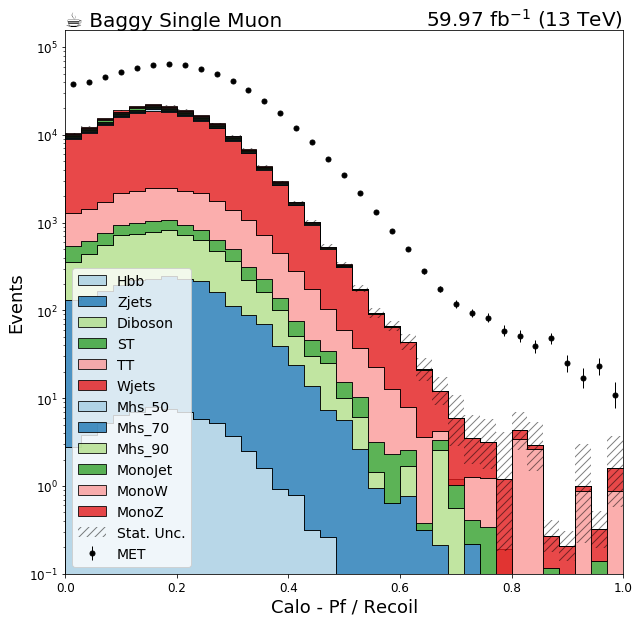

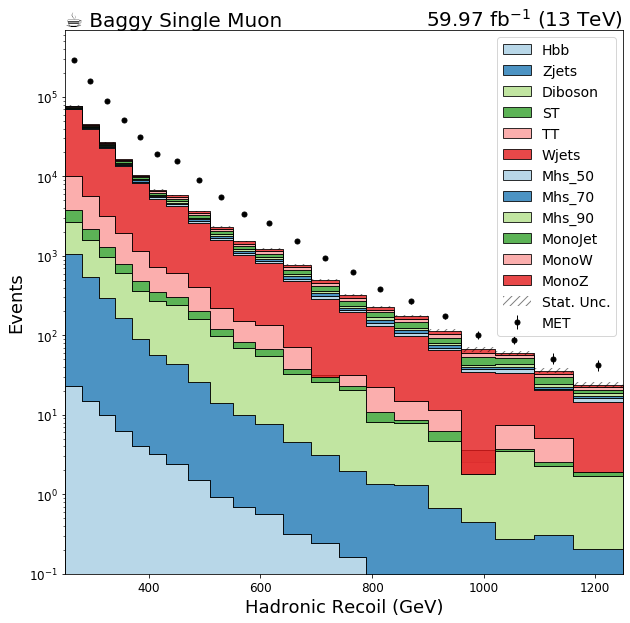

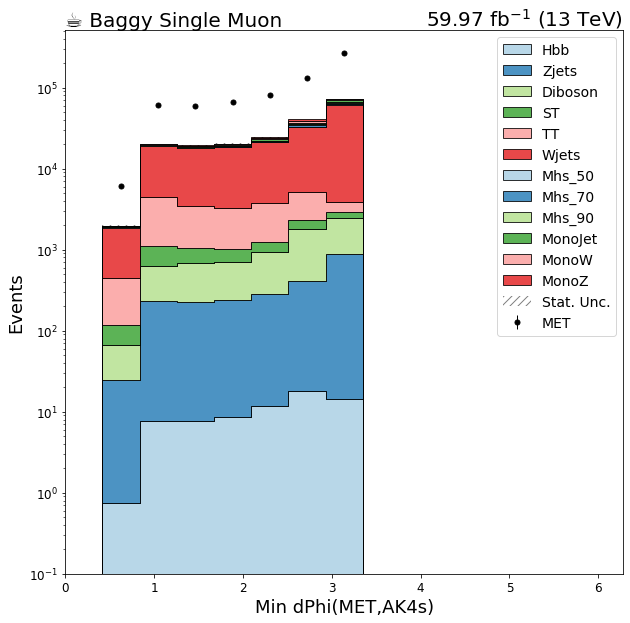

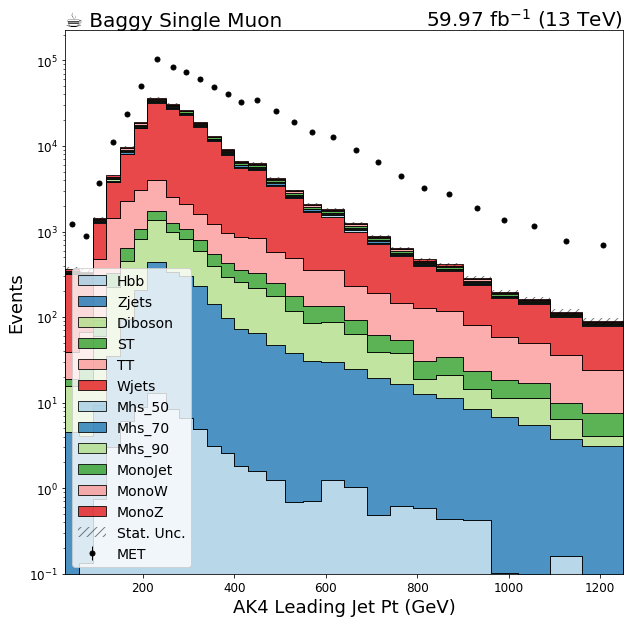

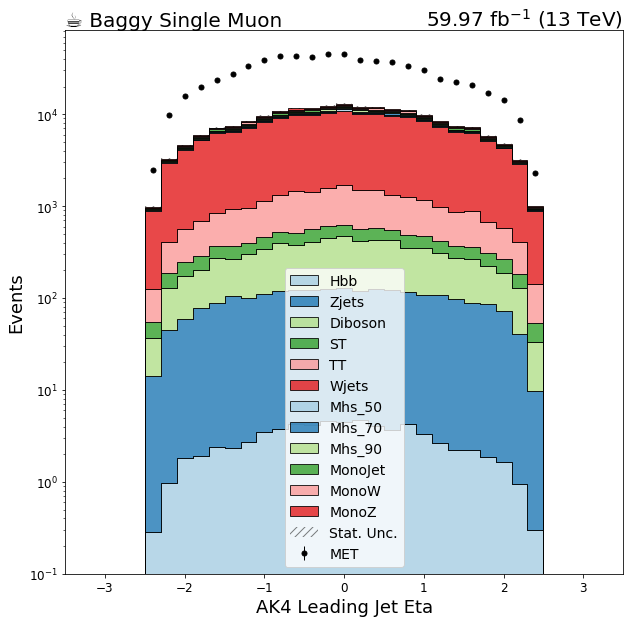

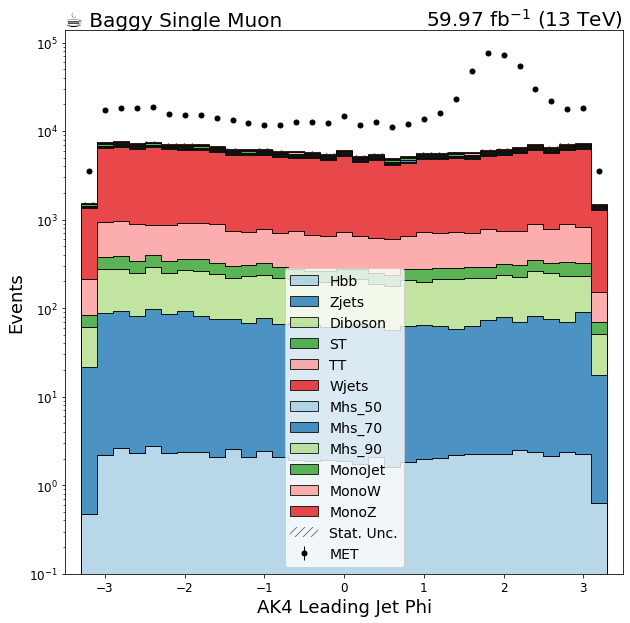

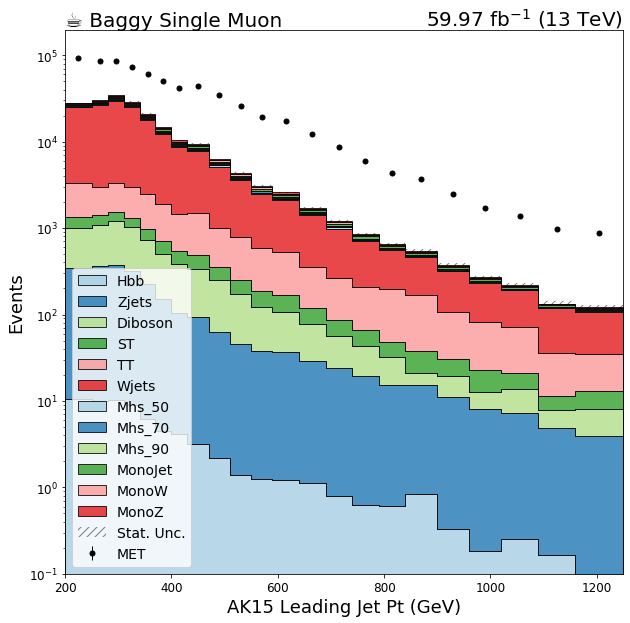

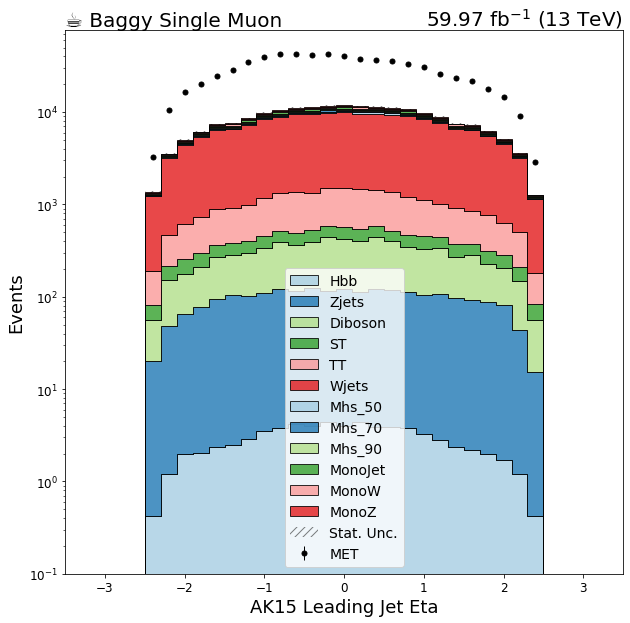

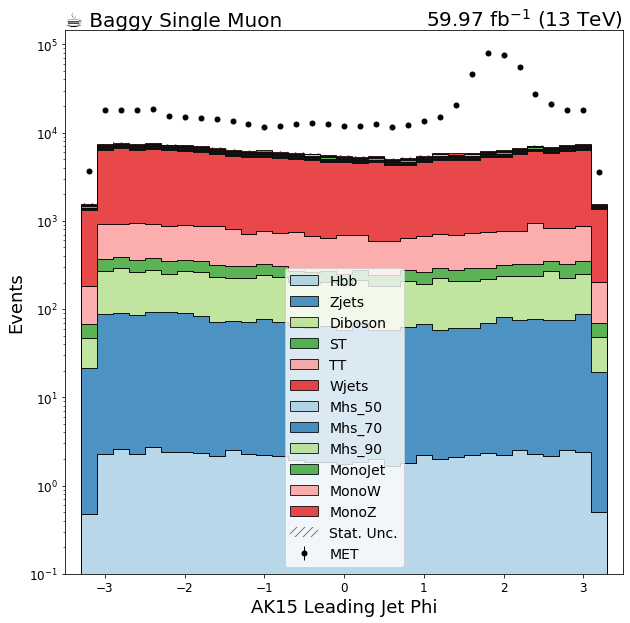

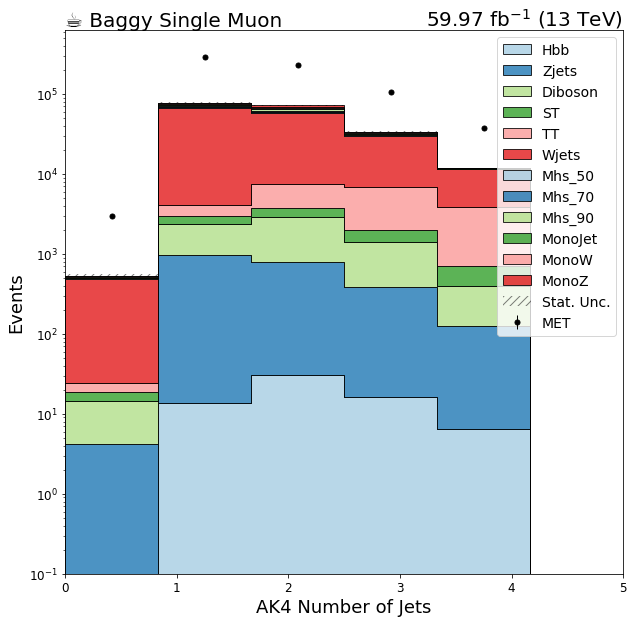

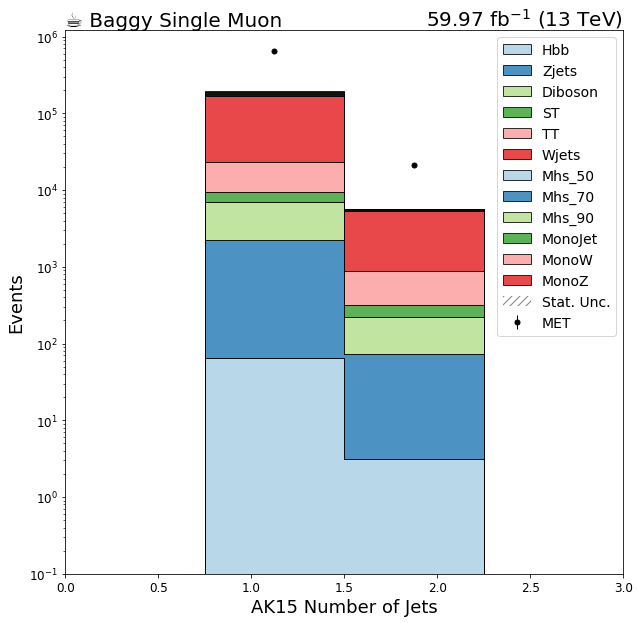

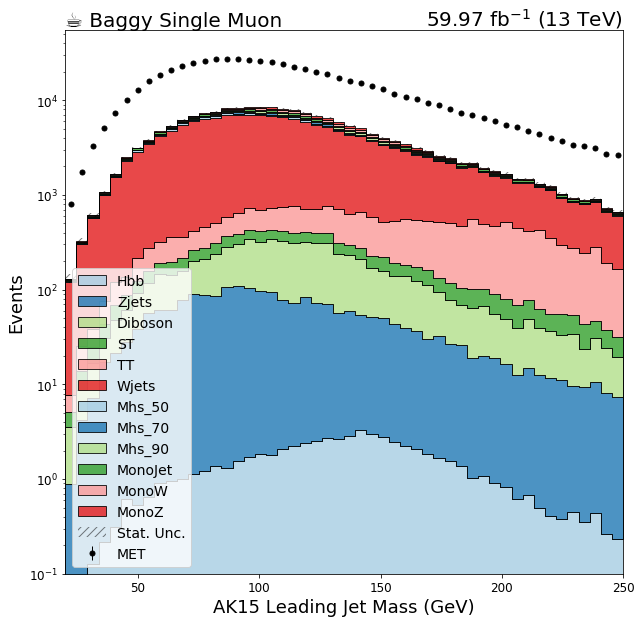

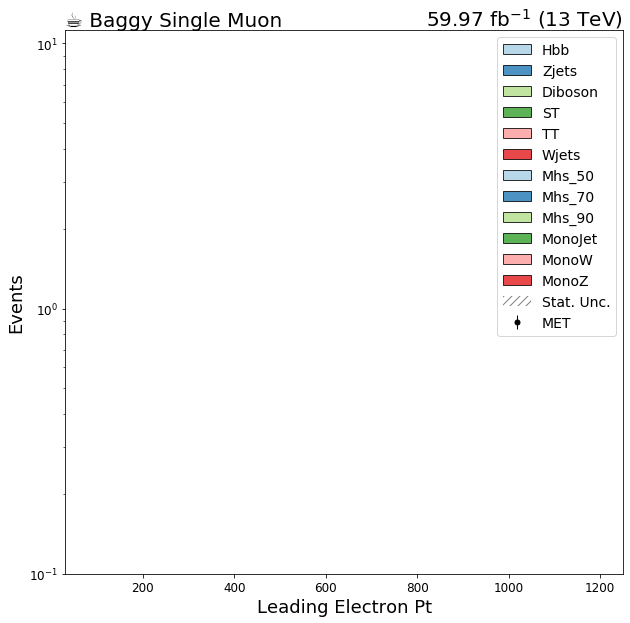

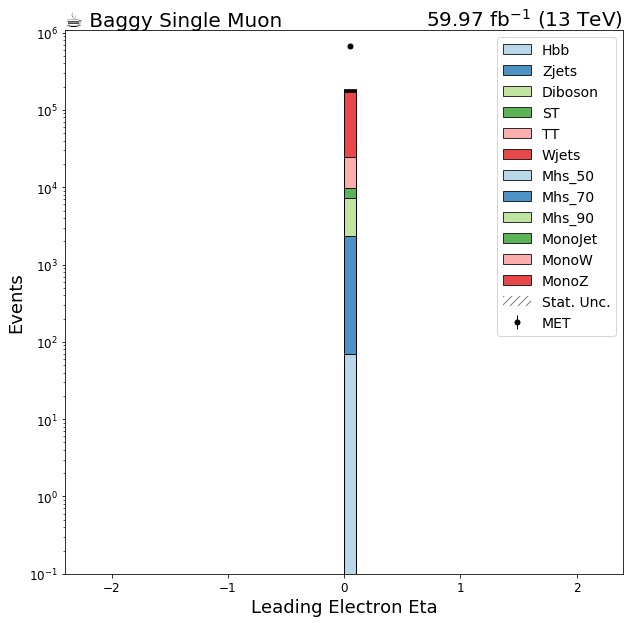

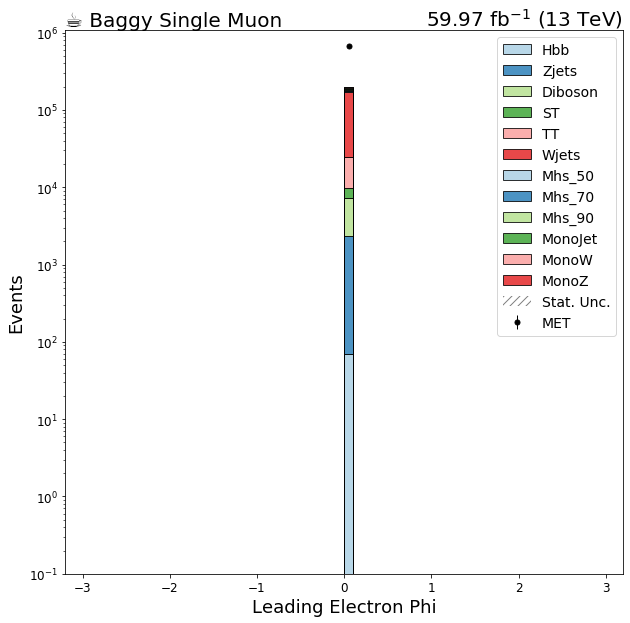

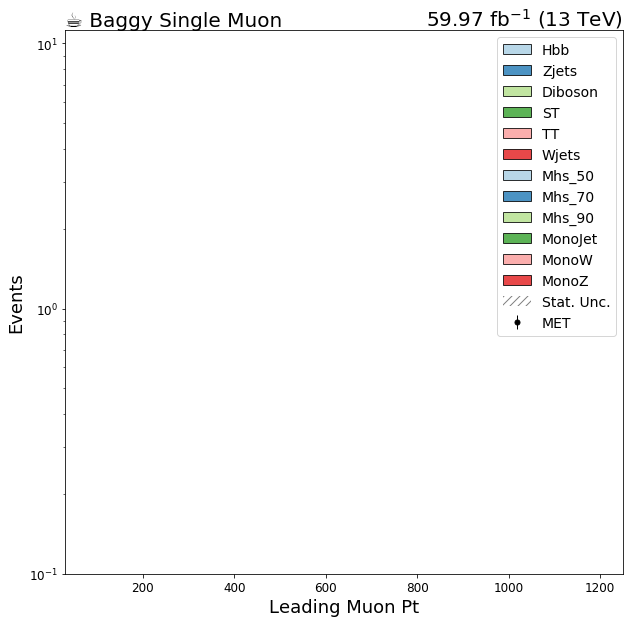

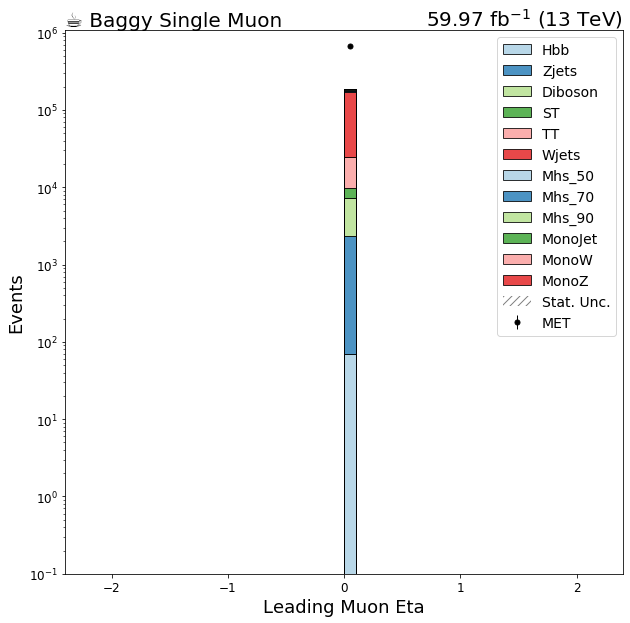

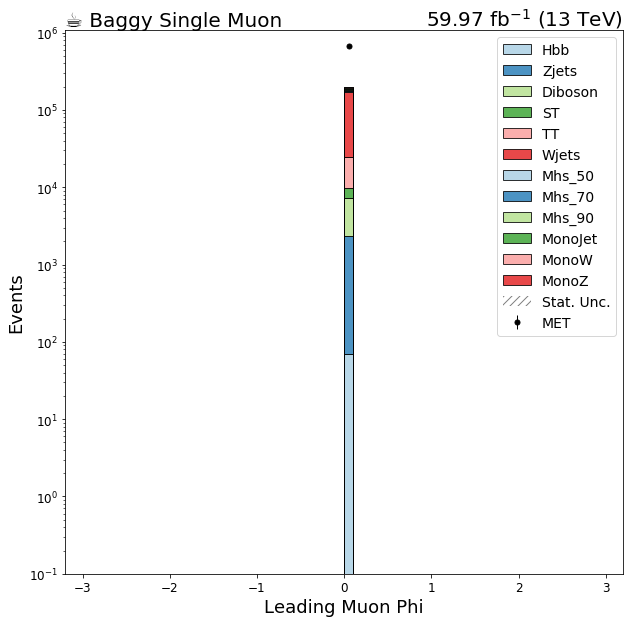

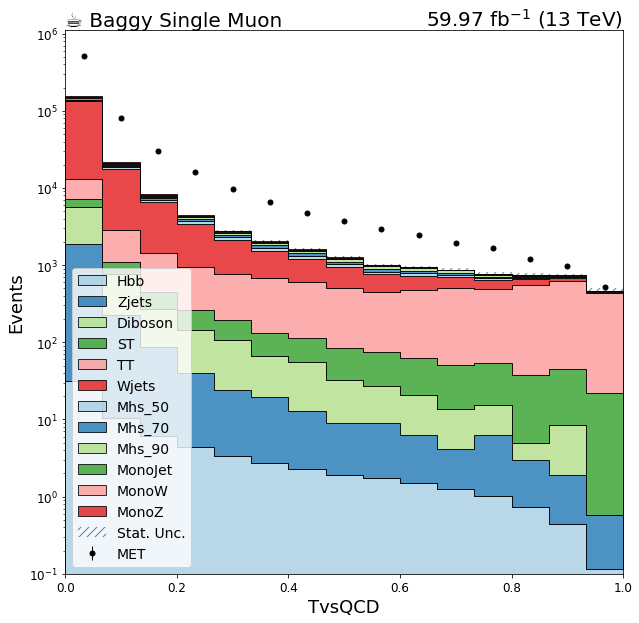

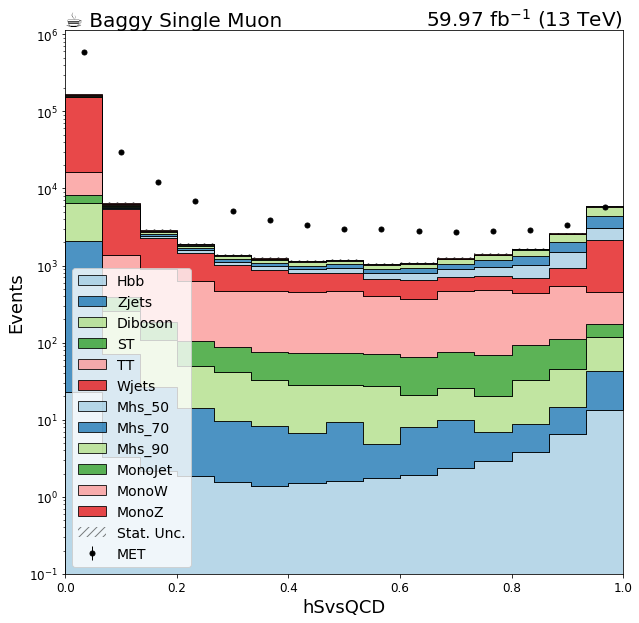

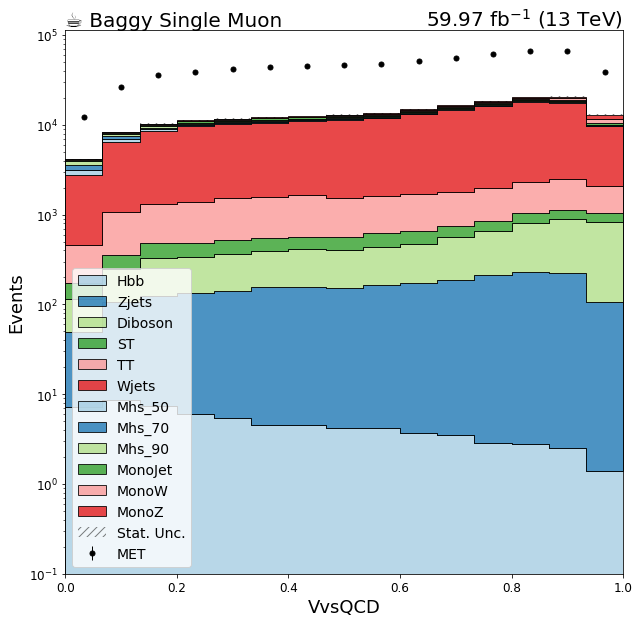

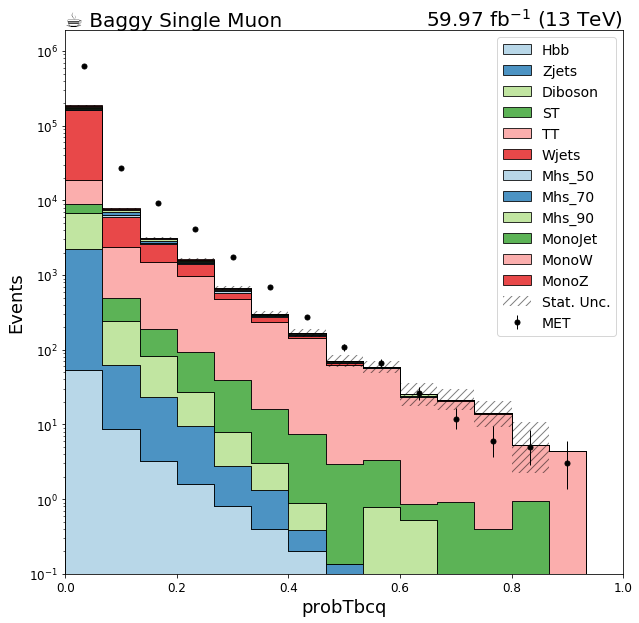

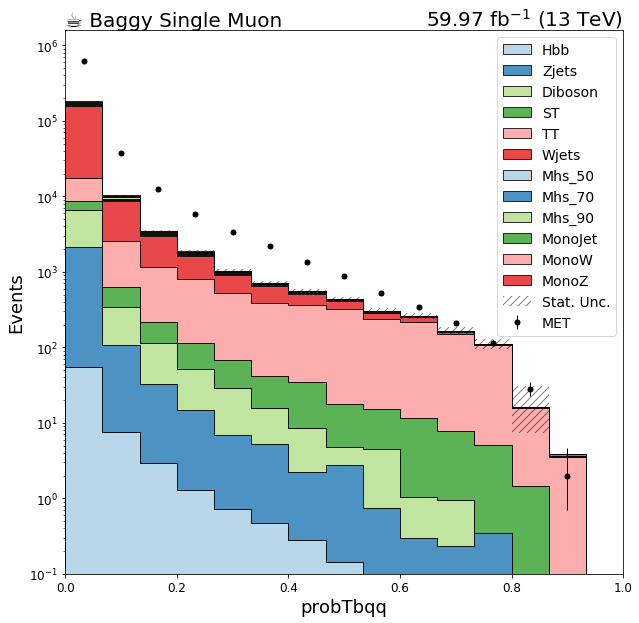

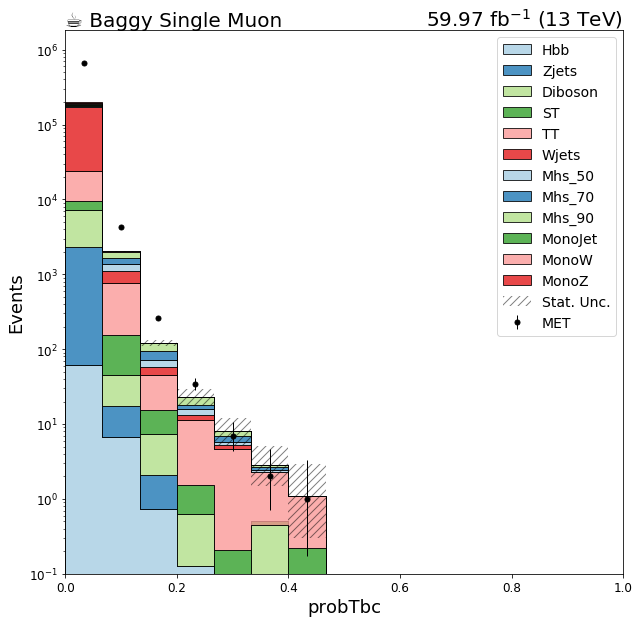

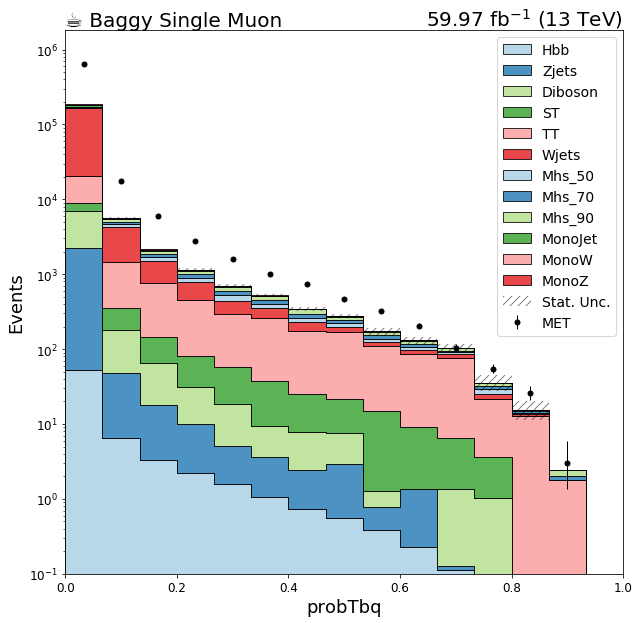

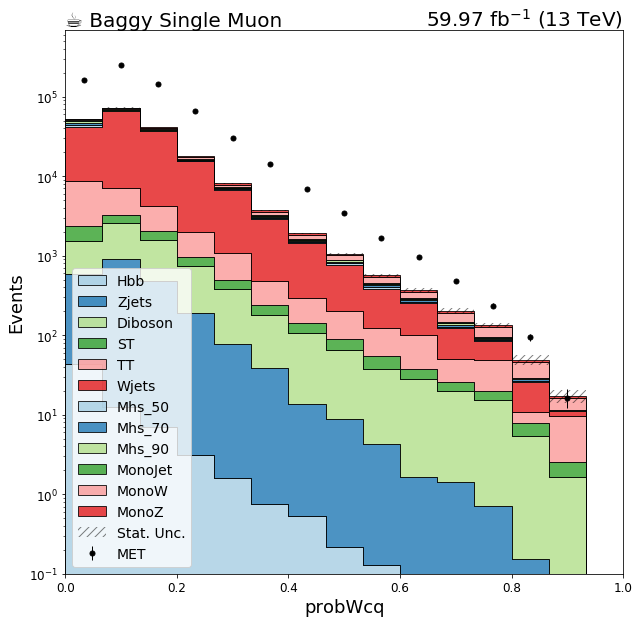

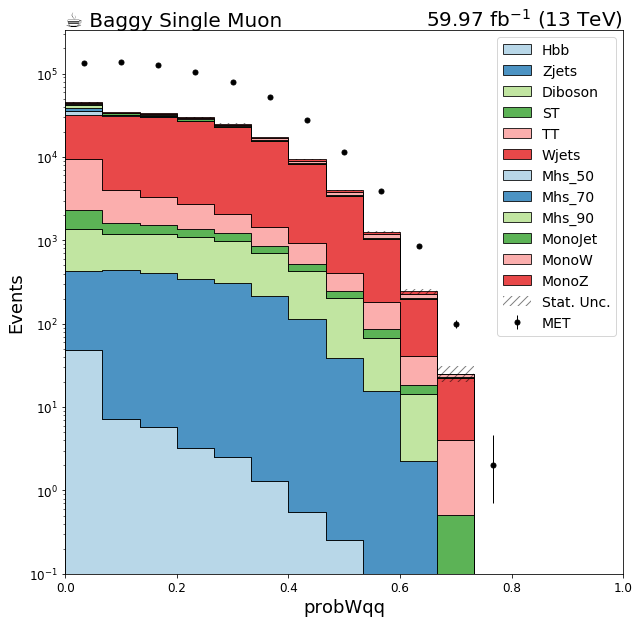

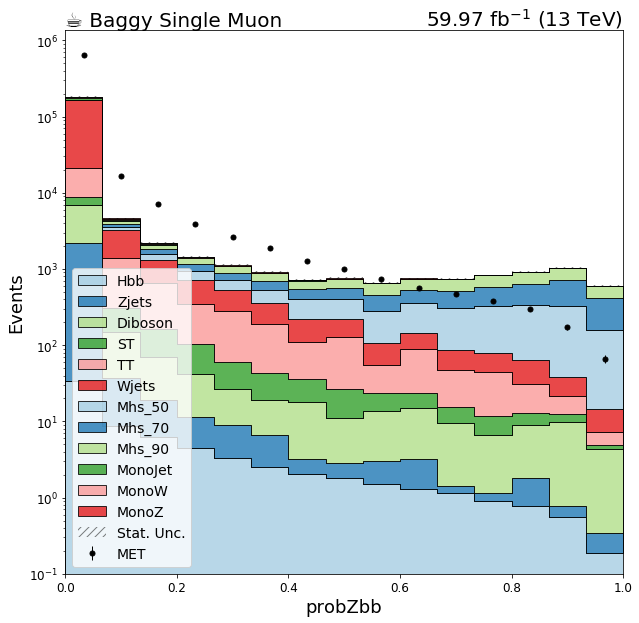

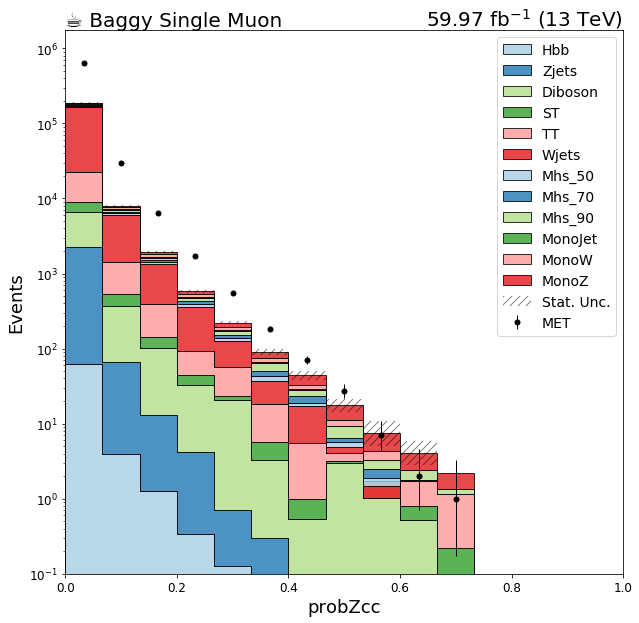

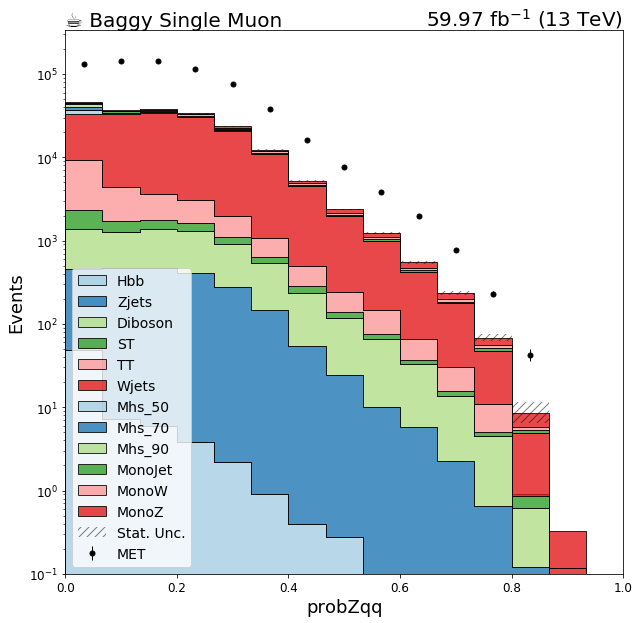

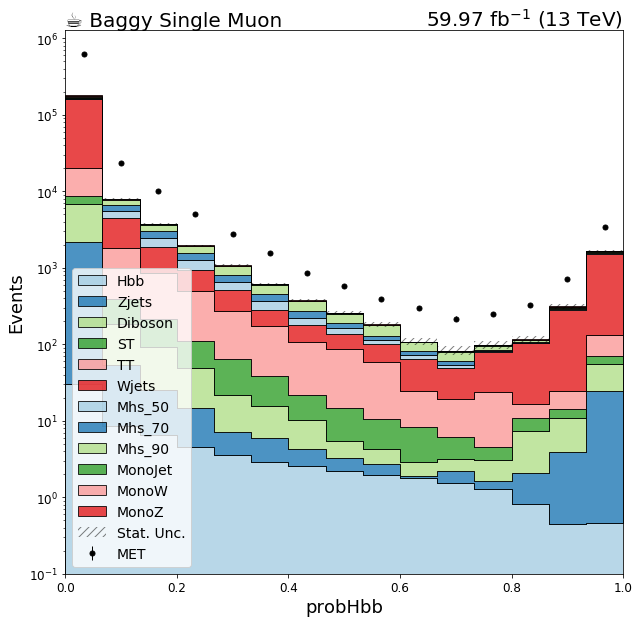

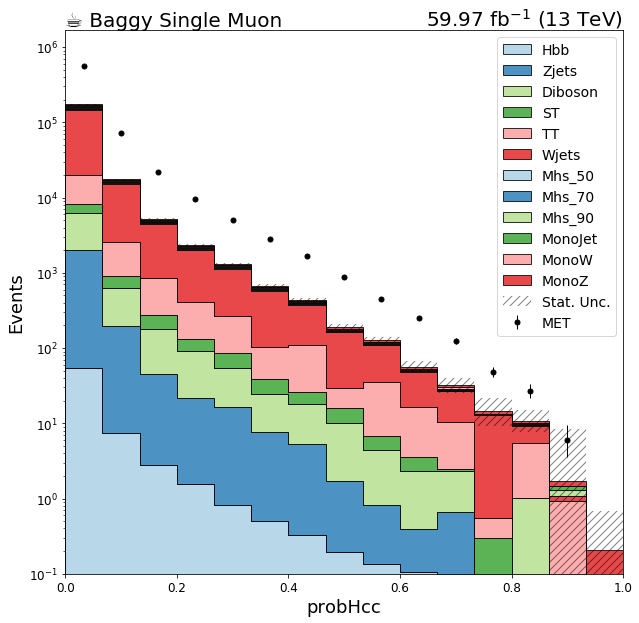

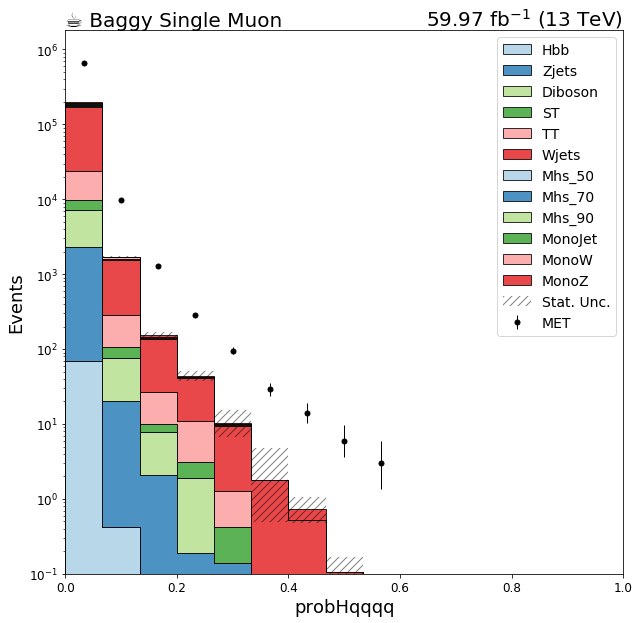

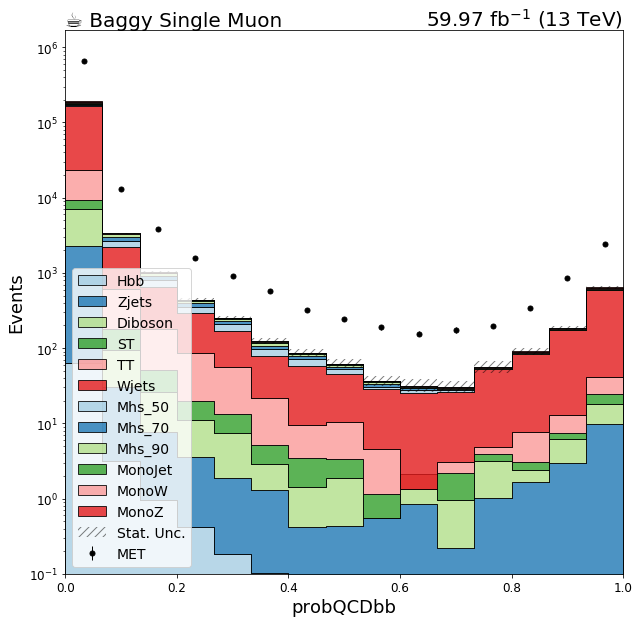

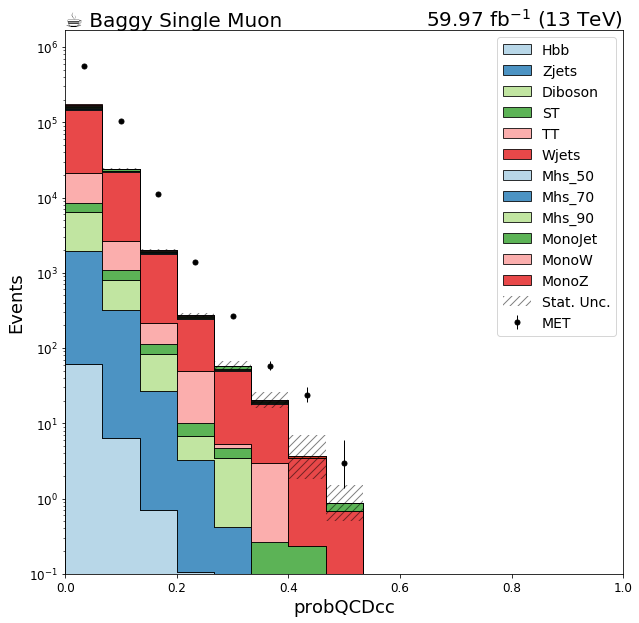

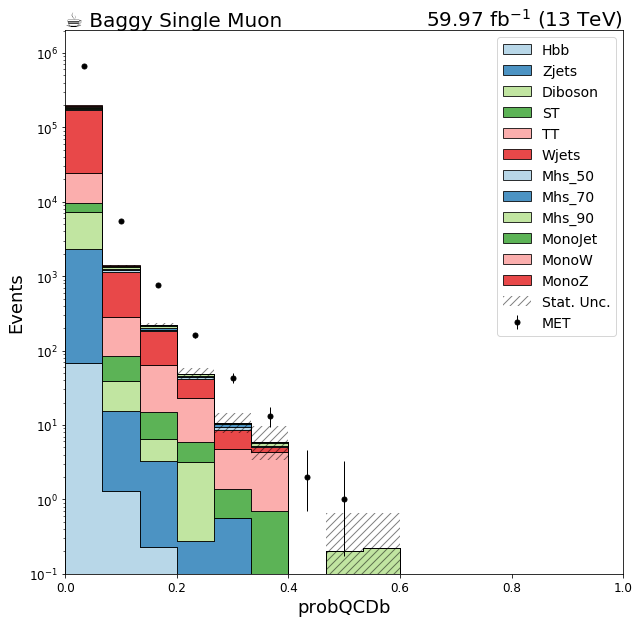

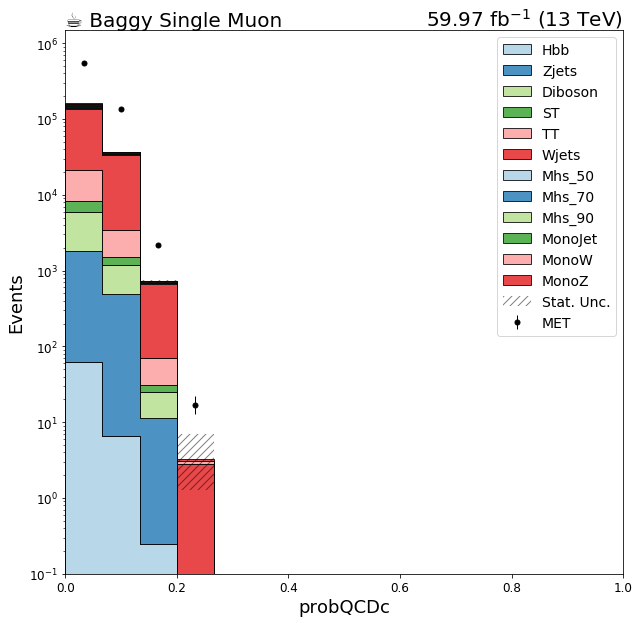

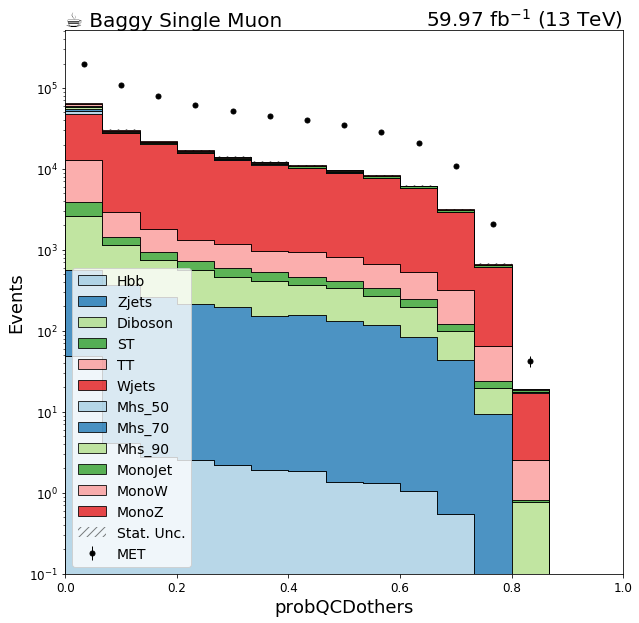

In [21]:
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    #plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','isoneM'),
    plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','iszeroL'),            
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    #plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'),
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','iszeroL'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            line_opts=None,
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Baggy Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

/home/jongho/Physics/Python3/decaf/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


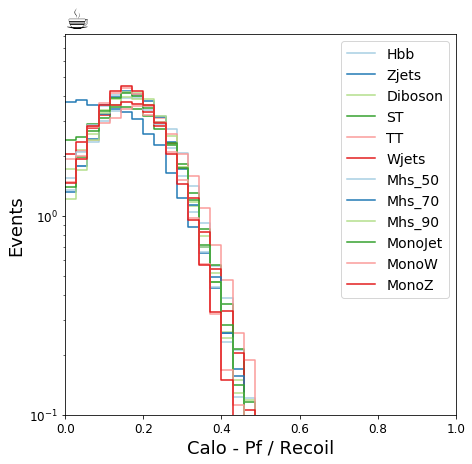

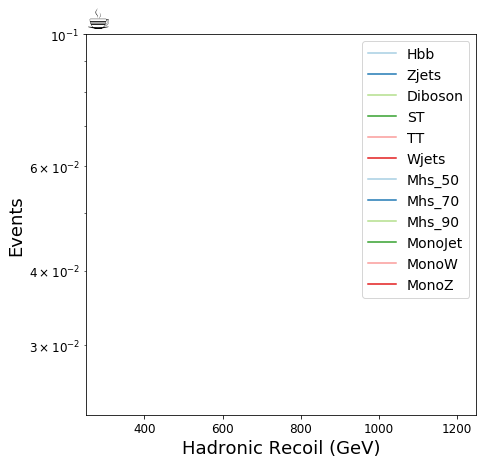

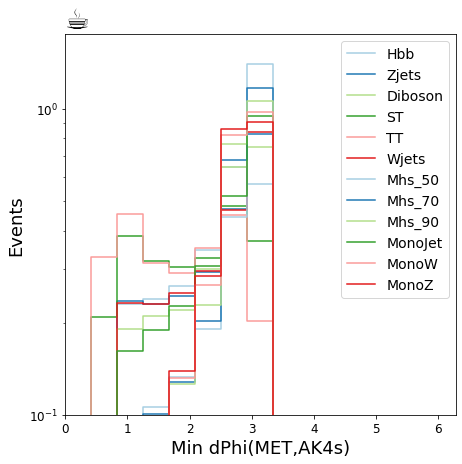

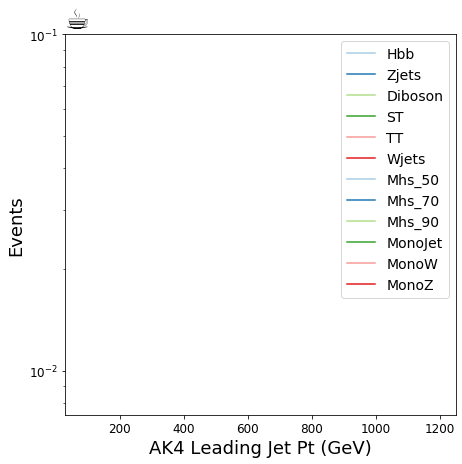

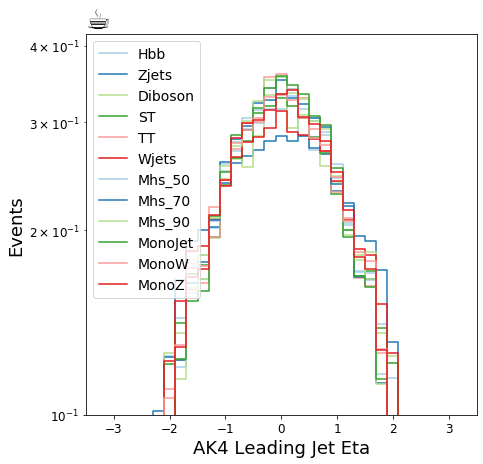

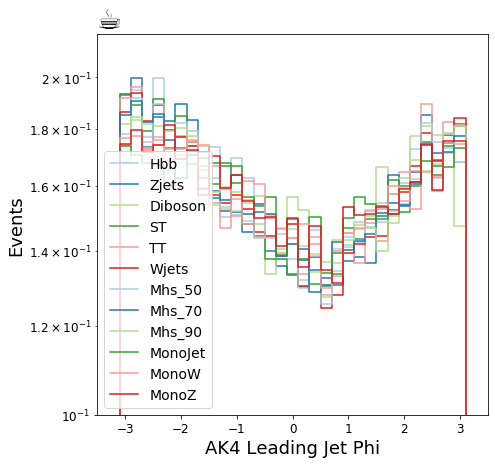

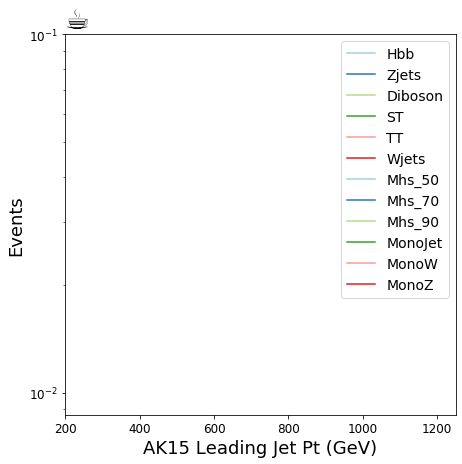

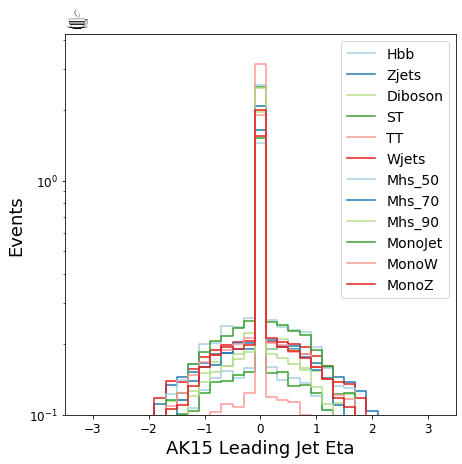

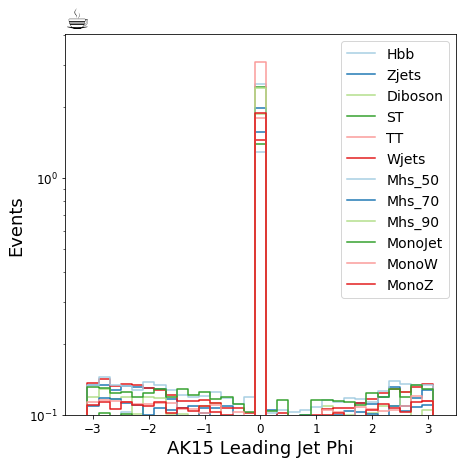

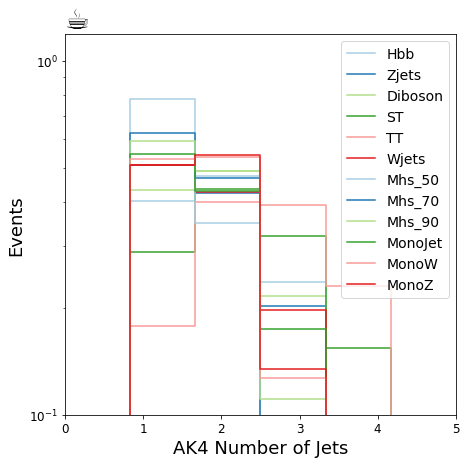

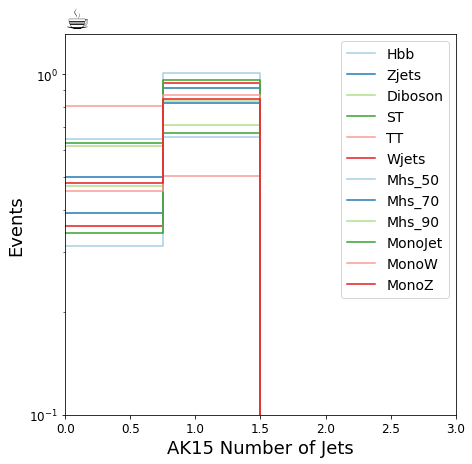

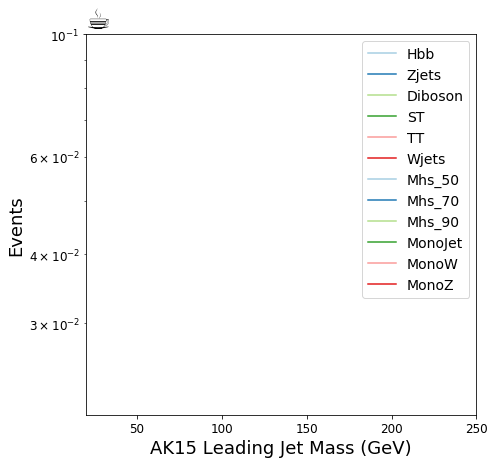

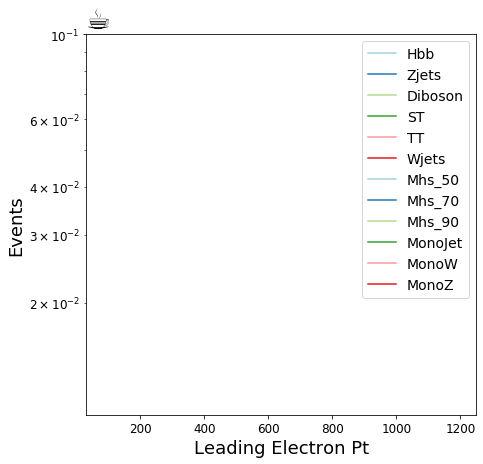

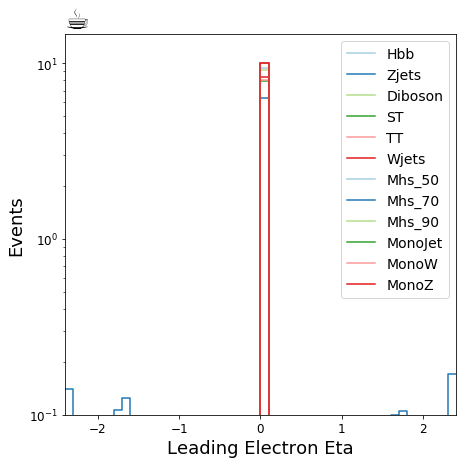

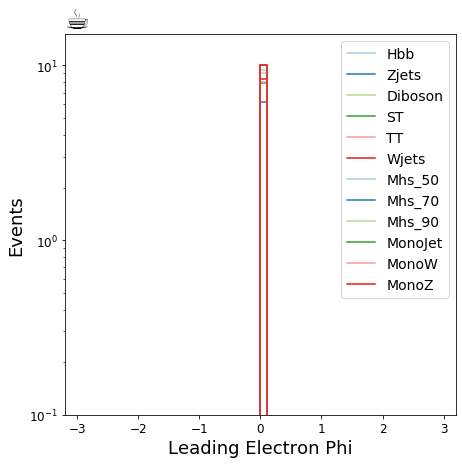

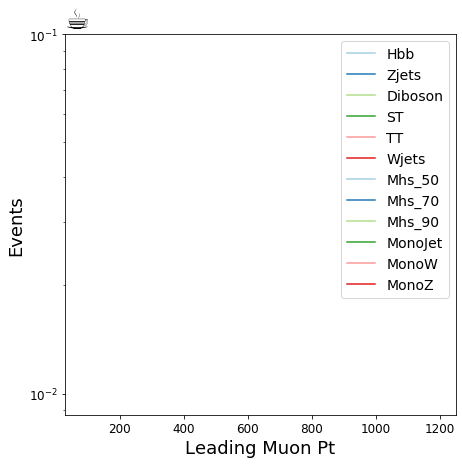

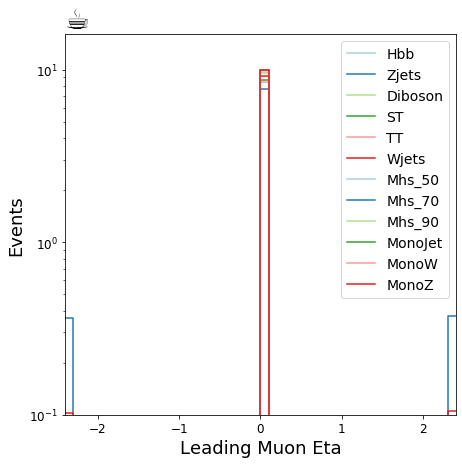

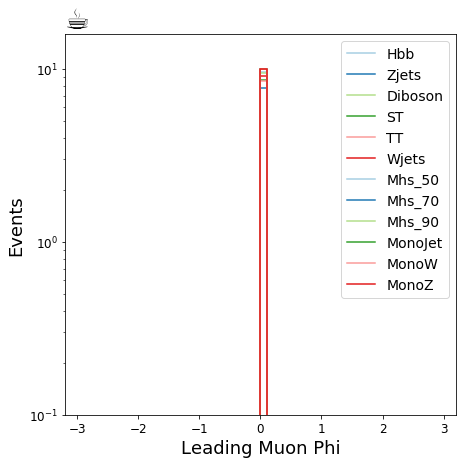

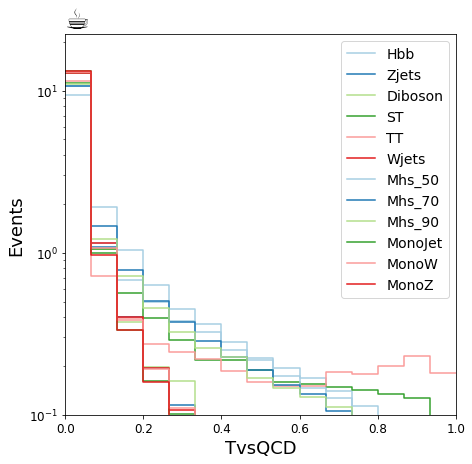

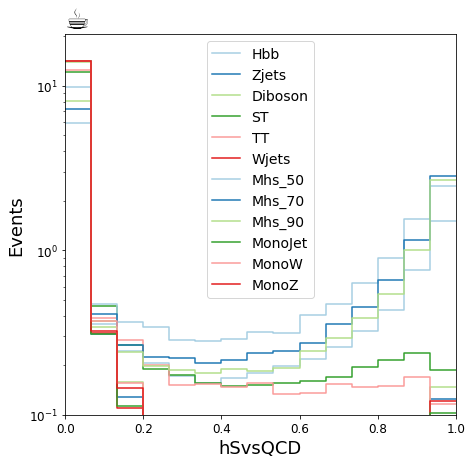

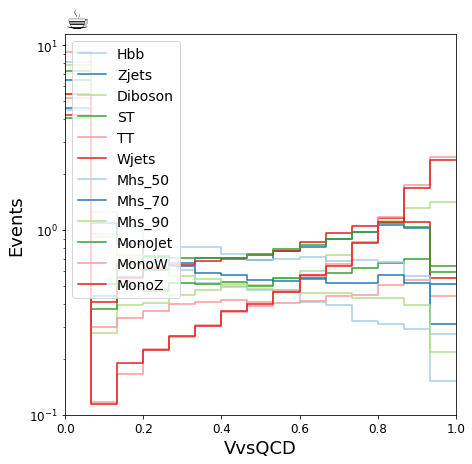

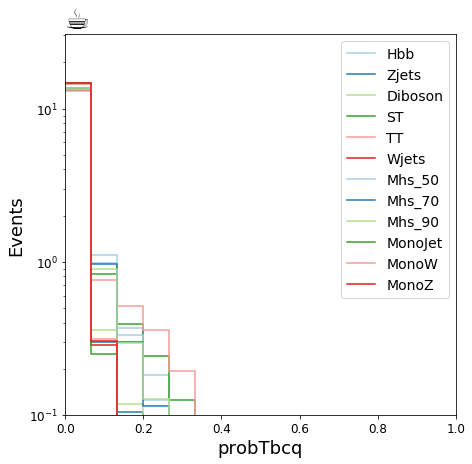

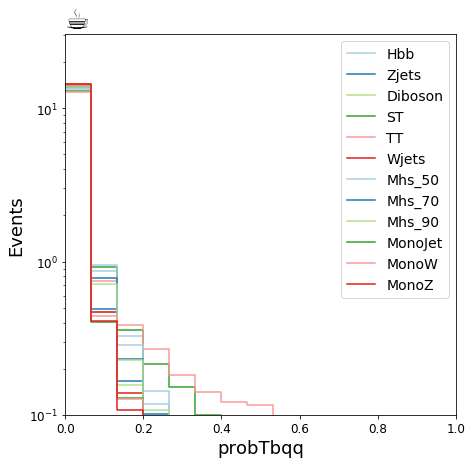

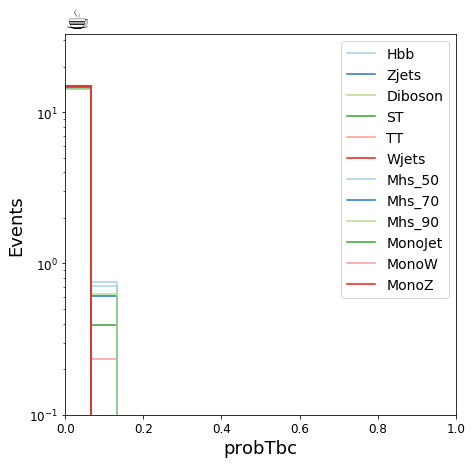

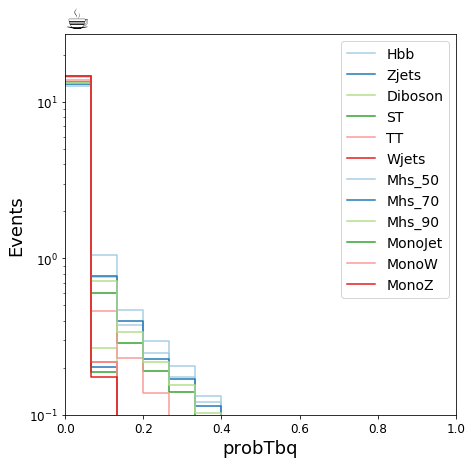

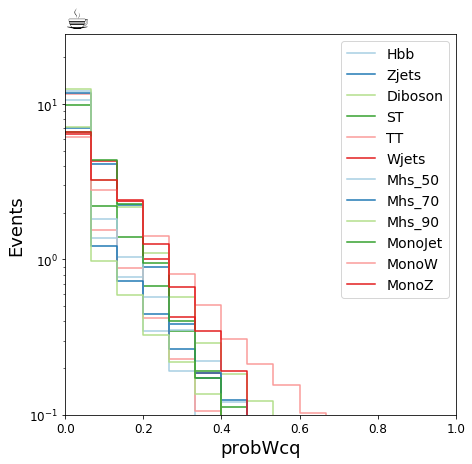

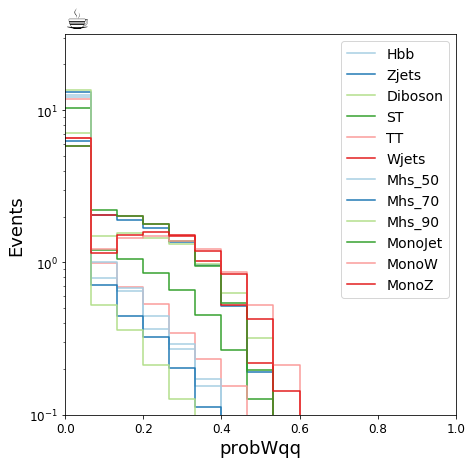

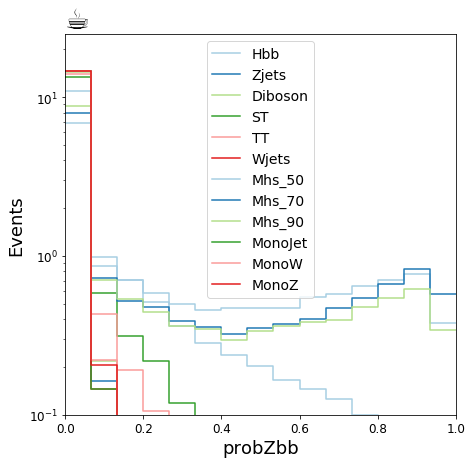

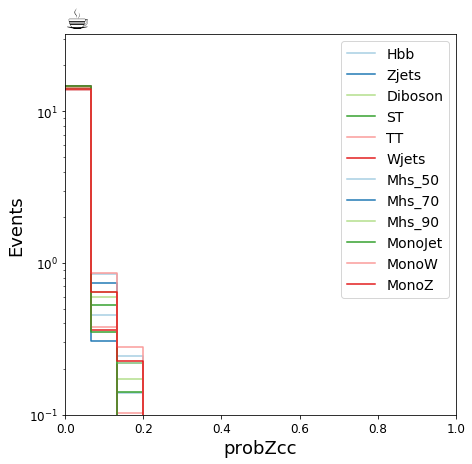

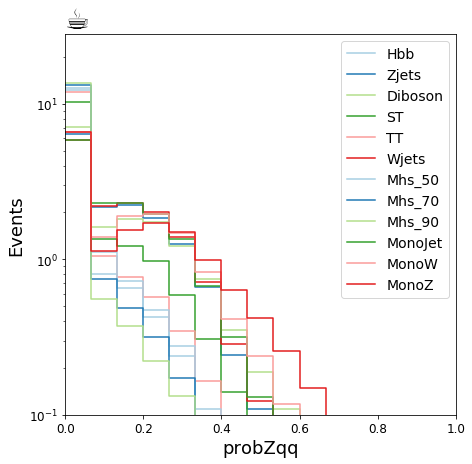

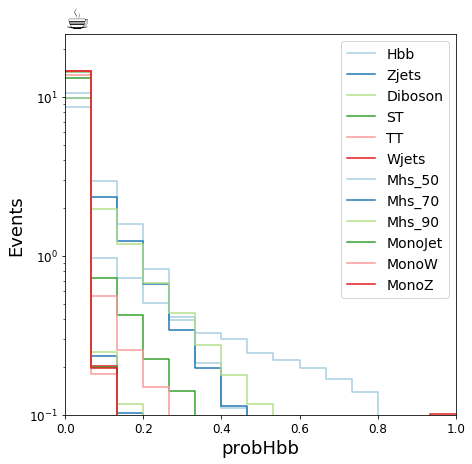

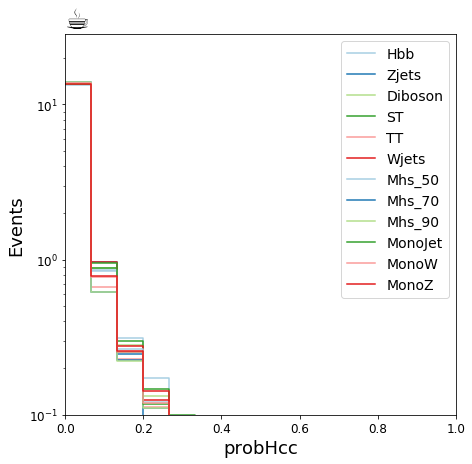

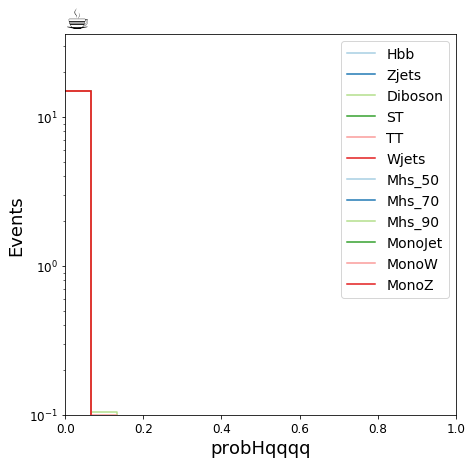

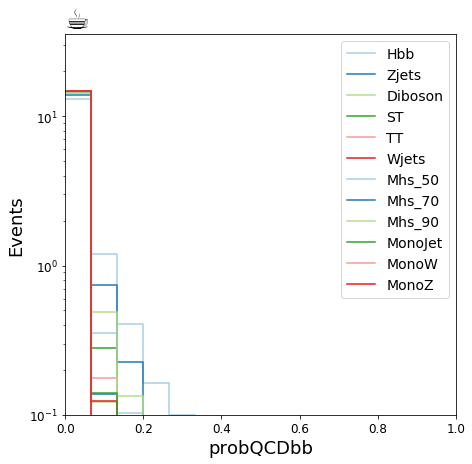

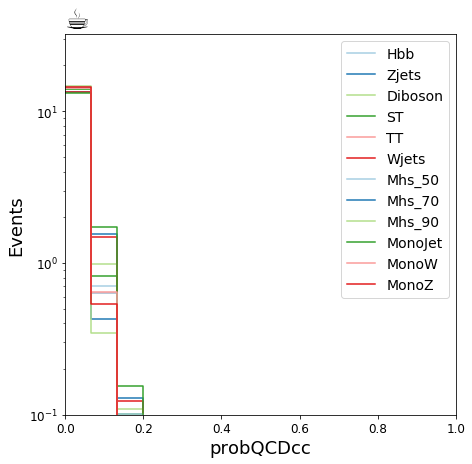

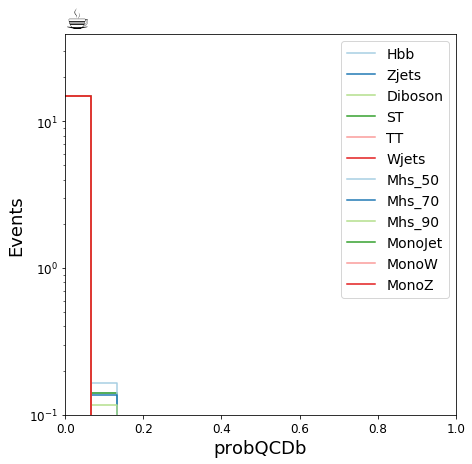

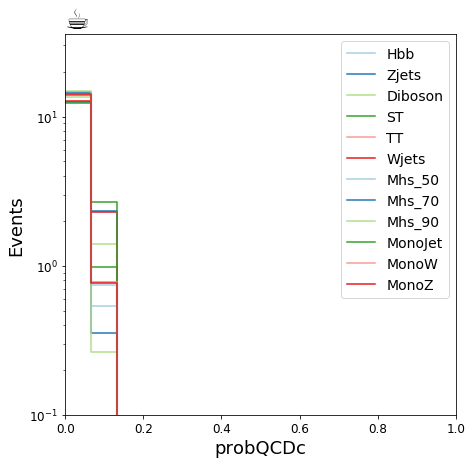

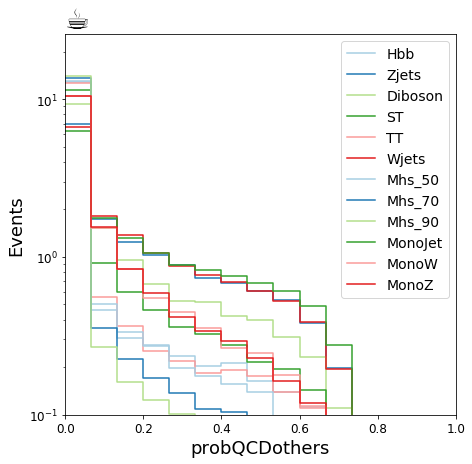

In [22]:
for key in hists.keys():
    if key=='sumw': continue

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection').project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)


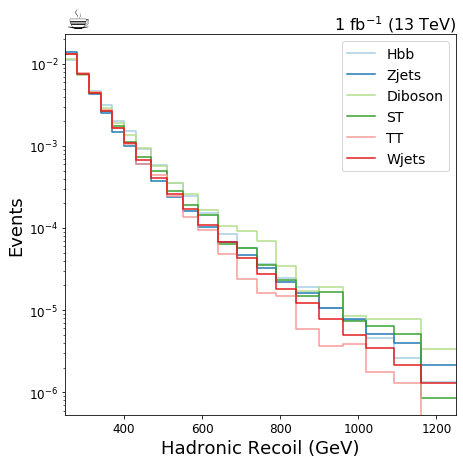

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('jet_selection').project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)